In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
#Predict which passengers survived the tragedy

In [2]:
train=pd.read_csv("D:\\Data Science\\Kaggle\\titanic dataset\\train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [6]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [7]:
#siblings/spouse  
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [8]:
#children/parents
train[["Parch","Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
train[["Embarked","Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [25]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

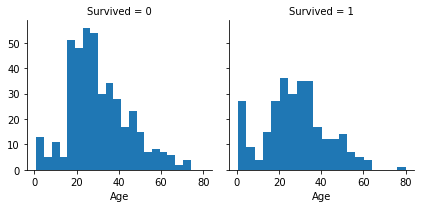

In [31]:
# Explore Age vs Sex, Parch , Pclass and SibSP
#g = sns.factorplot(y="Survived",x="Sex",data=train,kind="bar")
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [32]:
train=train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [33]:
train=pd.get_dummies(train)

In [34]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [35]:
train.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [36]:
train=train.dropna()

In [37]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [38]:
X.shape

(714, 10)

In [39]:
#Decision trees to understand the segments
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

clf=tree.DecisionTreeClassifier(max_depth=3,random_state=1)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [40]:
#Prediction on Test set
test=pd.read_csv("D:\\Data Science\\Kaggle\\titanic dataset\\test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
test=test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test=pd.get_dummies(test)
test=test.dropna()
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [42]:
clf.predict_proba(test)

array([[0.88181818, 0.11818182],
       [0.44303797, 0.55696203],
       [0.88181818, 0.11818182],
       [0.88181818, 0.11818182],
       [0.44303797, 0.55696203],
       [0.88181818, 0.11818182],
       [0.44303797, 0.55696203],
       [0.88181818, 0.11818182],
       [0.44303797, 0.55696203],
       [0.88181818, 0.11818182],
       [0.61616162, 0.38383838],
       [0.05095541, 0.94904459],
       [0.88181818, 0.11818182],
       [0.05095541, 0.94904459],
       [0.05095541, 0.94904459],
       [0.88181818, 0.11818182],
       [0.88181818, 0.11818182],
       [0.44303797, 0.55696203],
       [0.44303797, 0.55696203],
       [0.61616162, 0.38383838],
       [0.88181818, 0.11818182],
       [0.61616162, 0.38383838],
       [0.05095541, 0.94904459],
       [0.88181818, 0.11818182],
       [0.05095541, 0.94904459],
       [0.88181818, 0.11818182],
       [0.61616162, 0.38383838],
       [0.88181818, 0.11818182],
       [0.88181818, 0.11818182],
       [0.44303797, 0.55696203],
       [0.

In [43]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                       proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)   

In [ ]:
#WHich passenger survived the tragedy

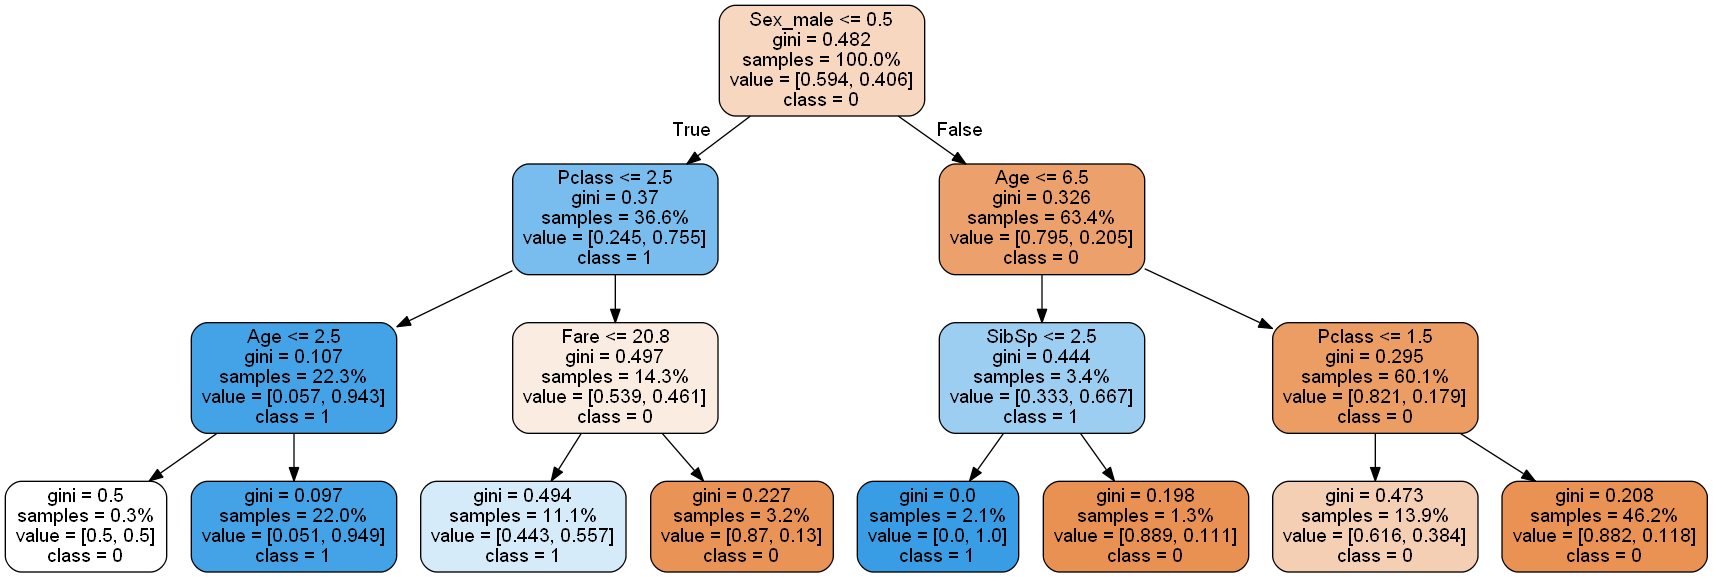

In [44]:
from IPython.display import Image
Image(graph.create_png())

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf=RandomForestClassifier(oob_score=True,max_depth=5,max_features='sqrt')
clf.fit(X,y)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [47]:
clf.oob_score_

0.8081232492997199

In [48]:
clf.predict_proba(test)

array([[0.91531022, 0.08468978],
       [0.61245688, 0.38754312],
       [0.83322382, 0.16677618],
       [0.86782175, 0.13217825],
       [0.58276473, 0.41723527],
       [0.78158322, 0.21841678],
       [0.48840016, 0.51159984],
       [0.87828116, 0.12171884],
       [0.30233701, 0.69766299],
       [0.89867743, 0.10132257],
       [0.66431877, 0.33568123],
       [0.04724933, 0.95275067],
       [0.80164639, 0.19835361],
       [0.04312845, 0.95687155],
       [0.10960642, 0.89039358],
       [0.92466106, 0.07533894],
       [0.86658725, 0.13341275],
       [0.62380457, 0.37619543],
       [0.40737563, 0.59262437],
       [0.64992725, 0.35007275],
       [0.61329913, 0.38670087],
       [0.6268221 , 0.3731779 ],
       [0.01281155, 0.98718845],
       [0.90416931, 0.09583069],
       [0.00924012, 0.99075988],
       [0.86658725, 0.13341275],
       [0.66431877, 0.33568123],
       [0.88497972, 0.11502028],
       [0.89419025, 0.10580975],
       [0.63733597, 0.36266403],
       [0.

In [49]:
pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

Sex_female    0.277102
Sex_male      0.259308
Pclass        0.152658
Fare          0.111121
Age           0.102918
SibSp         0.042888
Parch         0.025126
Embarked_S    0.013695
Embarked_C    0.008048
Embarked_Q    0.007136
dtype: float64